In [86]:
from IPython.core.interactiveshell import InteractiveShell   
InteractiveShell.ast_node_interactivity = "all"
import numpy as np, pandas as pd, matplotlib.pylab as plt, seaborn as sns, statsmodels.api as sm
from sklearn.model_selection import train_test_split as tts
from scipy.stats import shapiro
from sklearn.metrics import accuracy_score,r2_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.cluster import KMeans
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA, LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA
import sklearn
from sklearn import tree
from collections import Counter
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

# DATASET 1. Unsupervised Learning on Shop customers

In [155]:
df1 = pd.read_csv("Customers.csv") #Open dataset
df1

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [156]:
df1.info() #Check dataset values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [157]:
df1 = df1.drop(['CustomerID'], axis=1) #Drop id
df1.isna().sum() #Check dataset values for missing values
df1 = df1.dropna() #Drop missing values
df1.shape
df1.isna().sum()

Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

(1965, 7)

Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [158]:
df1 = df1.join(pd.get_dummies(df1['Gender'])) #Make dummy variables for gender
df1 = df1.drop(['Gender'], axis=1)
df1.head(10)
df1.shape

,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Female,Male
0,19,15000,39,Healthcare,1,4,0,1
1,21,35000,81,Engineer,3,3,0,1
2,20,86000,6,Engineer,1,1,1,0
3,23,59000,77,Lawyer,0,2,1,0
4,31,38000,40,Entertainment,2,6,1,0
5,22,58000,76,Artist,0,2,1,0
6,35,31000,6,Healthcare,1,3,1,0
7,23,84000,94,Healthcare,1,3,1,0
8,64,97000,3,Engineer,0,3,0,1
9,30,98000,72,Artist,1,4,1,0


(1965, 8)

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Profession'>

<AxesSubplot:>

<AxesSubplot:xlabel='Profession', ylabel='Annual Income ($)'>

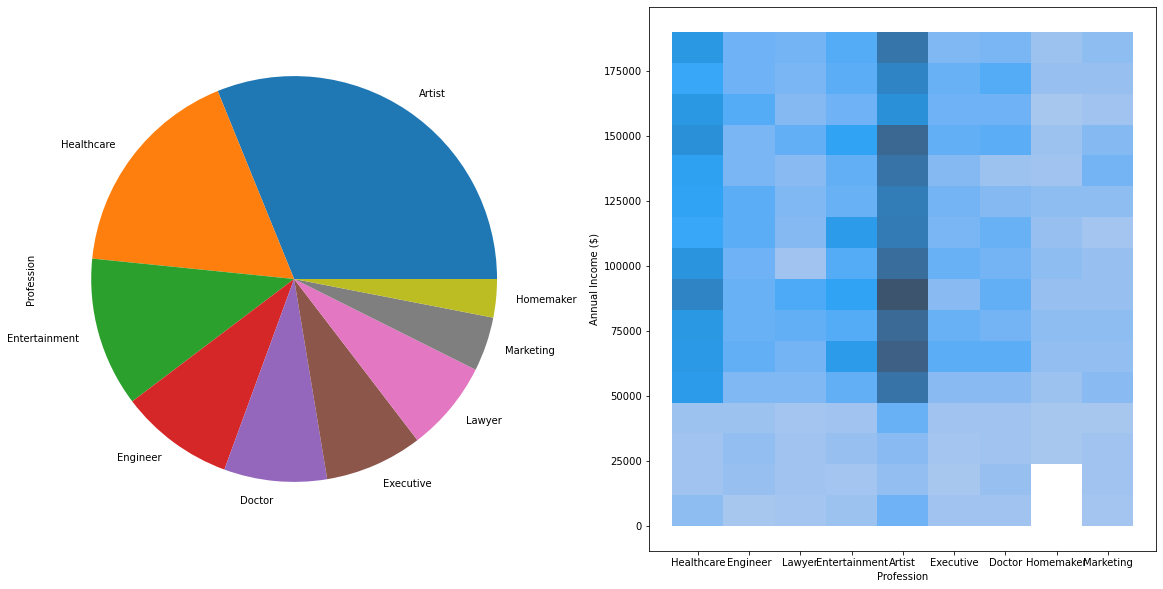

In [159]:
#Look at profession types used in the dataset
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
df1['Profession'].value_counts().plot(kind='pie')

plt.subplot(1, 2, 2)
sns.histplot(x=df1["Profession"], y=df1['Annual Income ($)'])

In [160]:
df1 = df1.join(pd.get_dummies(df1['Profession'])) #Make dummy variables for professions
df1 = df1.drop(['Profession'], axis=1)
df1.head(10)
df1.shape

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Female,Male,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0
5,22,58000,76,0,2,1,0,1,0,0,0,0,0,0,0,0
6,35,31000,6,1,3,1,0,0,0,0,0,0,1,0,0,0
7,23,84000,94,1,3,1,0,0,0,0,0,0,1,0,0,0
8,64,97000,3,0,3,0,1,0,0,1,0,0,0,0,0,0
9,30,98000,72,1,4,1,0,1,0,0,0,0,0,0,0,0


(1965, 16)

In [161]:
#Preprocessing
sc= MaxAbsScaler()
sc = sc.fit_transform(df1)
df1_mas = pd.DataFrame(sc, columns = df1.columns)
df1_mas.head(10)
df1_mas.shape

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Female,Male,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0.19192,0.07896,0.39,0.05882,0.44444,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.21212,0.18424,0.81,0.17647,0.33333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.20202,0.45269,0.06,0.05882,0.11111,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.23232,0.31057,0.77,0.00000,0.22222,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31313,0.20003,0.40,0.11765,0.66667,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.22222,0.30530,0.76,0.00000,0.22222,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.35354,0.16318,0.06,0.05882,0.33333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.23232,0.44217,0.94,0.05882,0.33333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.64646,0.51060,0.03,0.00000,0.33333,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.30303,0.51586,0.72,0.05882,0.44444,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(1965, 16)

In [162]:
#Preprocessing
pca = PCA(n_components = 0.95)
pca.fit(df1_mas)
df1_pca = pca.transform(df1_mas)
df1_pca

PCA(n_components=0.95)

array([[ 0.86206994, -0.48755463,  0.72919568, ...,  0.47317347,
         0.00852014,  0.06775163],
       [ 0.85438858, -0.20097575, -0.27409189, ...,  0.34033372,
         0.08288113, -0.02781824],
       [-0.55807934, -0.30610748, -0.28655483, ...,  0.18727251,
        -0.14560428, -0.1746597 ],
       ...,
       [ 0.86546361, -0.48860012,  0.7073281 , ...,  0.03419285,
         0.31517825, -0.19120501],
       [ 0.85716738, -0.20937755, -0.23223748, ..., -0.19222024,
        -0.03895809, -0.28945751],
       [ 0.86209372, -0.26604671, -0.5616717 , ...,  0.03769178,
         0.1480798 , -0.17676411]])

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=1)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=2)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=4)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=5)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=6)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=7)

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans()

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=9)

Text(0.5, 1.0, 'Elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Inertia')

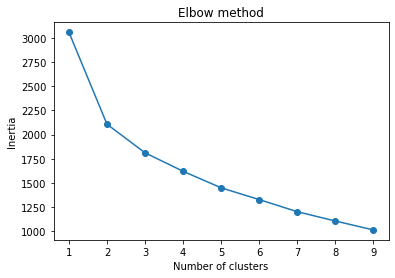

In [163]:
# Elbow algorithm in order to find opimal number of clusters
inertias = []
for i in range(1,10):
 kmeans = KMeans(n_clusters=i)
 kmeans.fit(df1_pca)
 inertias.append(kmeans.inertia_)
plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


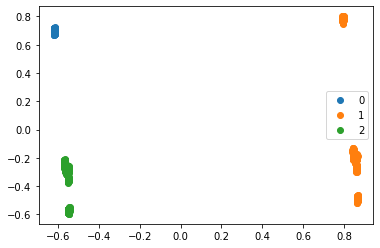

In [164]:
#Divide into clusters
kmeans = KMeans(n_clusters = 3)
label = kmeans.fit_predict(df1_pca)
c4label = label
u = np.unique(label)
fig, ax = plt.subplots()
for i in u:
    plt.scatter(df1_pca[label == i , 0] , df1_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [165]:
def make_autopct(values): #percentage function
 def my_autopct(pct):
    total = sum(values)
    val = int(round(pct*total/100.0))
    return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
 return my_autopct
c1 = Counter(label)
c1

Counter({1: 799, 2: 786, 0: 380})

In [167]:
pr1 = np.array([799, 786, 380]) #Array for later visualization

([<matplotlib.patches.Wedge at 0x21610f96850>,
 [Text(0.31810337208430706, 1.053000591010562, 'Second cluster'),
  Text(-0.8622812750625338, -0.6829868246727246, 'Third cluster'),
  Text(0.9031637375594124, -0.6279293456733115, 'First cluster')],
 [Text(0.1735109302278038, 0.5743639587330338, '40.66% (799)'),
  Text(-0.47033524094320023, -0.3725382680033043, '40.00% (786)'),
  Text(0.4926347659414976, -0.3425069158218062, '19.34% (380)')])

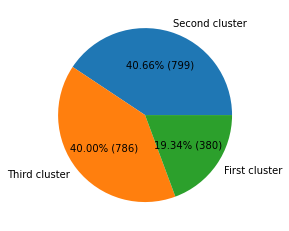

In [168]:
mylabels = ["Second cluster", "Third cluster", "First cluster"]  #Cluster visualization
plt.pie(pr1, labels=mylabels, autopct=make_autopct(pr1))
plt.show()

In [169]:
dflabel4 = pd.DataFrame(df1.copy()) #dataframe with clusters
dflabel4['Cluster'] = c4label
dflabel4.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Female,Male,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cluster
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,1
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,1
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,2
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,2
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,2


In [184]:
dfbylabel4 = pd.DataFrame({'features': list(dflabel4)}) #Spot differences in clusters
dfbylabel4['1 mean'] = list(dflabel4.loc[dflabel4['Cluster'] == 0].mean())
dfbylabel4['2 mean'] = list(dflabel4.loc[dflabel4['Cluster'] == 1].mean())
dfbylabel4['3 mean'] = list(dflabel4.loc[dflabel4['Cluster'] == 2].mean())
pd.set_option('display.width', 150)
pd.set_option('display.colheader_justify', 'right')
pd.set_option('display.precision', 5)
dfbylabel4

,features,1 mean,2 mean,3 mean
0,Age,49.28421,48.87735,48.72392
1,Annual Income ($),108102.32632,110880.34293,111562.57125
2,Spending Score (...,51.86053,51.20401,50.57379
3,Work Experience,4.18421,4.17522,3.96438
4,Family Size,3.64474,3.75219,3.81679
5,Female,1.00000,0.00000,1.00000
6,Male,0.00000,1.00000,0.00000
7,Artist,1.00000,0.29036,0.00000
8,Doctor,0.00000,0.09011,0.11323
9,Engineer,0.00000,0.09512,0.13104


C:\Users\artem\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


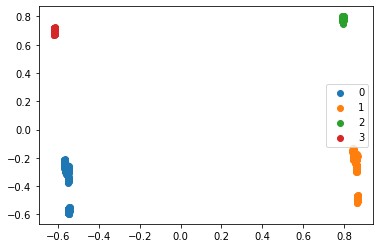

In [172]:
kmeans = KMeans(n_clusters = 4) #The same process for 4 clusters
label = kmeans.fit_predict(df1_pca)
c6label = label
u = np.unique(label)
fig, ax = plt.subplots()
for i in u:
    plt.scatter(df1_pca[label == i , 0] , df1_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [174]:
c2 = Counter(label)
c2

Counter({1: 567, 0: 786, 3: 380, 2: 232})

In [175]:
pr2 = np.array([567, 786, 380, 232])

([<matplotlib.patches.Wedge at 0x2160eb84e80>,
 [Text(0.6781510925599525, 0.8660895425184066, 'Second cluster'),
  Text(-1.0971544005626965, 0.07907098915474858, 'First cluster'),
  Text(0.2415879238221728, -1.0731427095513868, 'Fourth cluster'),
  Text(1.025195436603244, -0.3987158346089155, 'Third cluster')],
 [Text(0.36990059594179225, 0.47241247773731265, '28.85% (567)'),
  Text(-0.5984478548523798, 0.04312963044804467, '40.00% (786)'),
  Text(0.13177523117573062, -0.585350568846211, '19.34% (380)'),
  Text(0.5591975108744967, -0.21748136433213572, '11.81% (232)')])

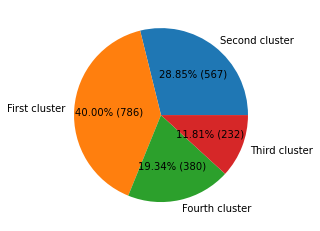

In [176]:
mylabels = ["Second cluster","First cluster", "Fourth cluster", "Third cluster"]
plt.pie(pr2, labels=mylabels, autopct=make_autopct(pr2))
plt.show()

In [177]:
dflabel6 = pd.DataFrame(df1.copy())
dflabel6['Cluster'] = c6label
dflabel6.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Female,Male,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Cluster
0,19,15000,39,1,4,0,1,0,0,0,0,0,1,0,0,0,1
1,21,35000,81,3,3,0,1,0,0,1,0,0,0,0,0,0,1
2,20,86000,6,1,1,1,0,0,0,1,0,0,0,0,0,0,0
3,23,59000,77,0,2,1,0,0,0,0,0,0,0,0,1,0,0
4,31,38000,40,2,6,1,0,0,0,0,1,0,0,0,0,0,0


In [181]:
dfbylabel6 = pd.DataFrame({'features': list(dflabel6)})
dfbylabel6['1 mean'] = list(dflabel6.loc[dflabel6['Cluster'] == 0].mean())
dfbylabel6['2 mean'] = list(dflabel6.loc[dflabel6['Cluster'] == 1].mean())
dfbylabel6['3 mean'] = list(dflabel6.loc[dflabel6['Cluster'] == 2].mean())
dfbylabel6['4 mean'] = list(dflabel6.loc[dflabel6['Cluster'] == 3].mean())
dfbylabel6

               features        1 mean        2 mean        3 mean        4 mean
0                   Age      48.72392      49.01235      48.54741      49.28421
1     Annual Income ($)  111562.57125  111289.26102  109880.96121  108102.32632
2   Spending Score (...      50.57379      50.05291      54.01724      51.86053
3       Work Experience       3.96438       4.13757       4.26724       4.18421
4           Family Size       3.81679       3.78660       3.66810       3.64474
5                Female       1.00000       0.00000       0.00000       1.00000
6                  Male       0.00000       1.00000       1.00000       0.00000
7                Artist       0.00000       0.00000       1.00000       1.00000
8                Doctor       0.11323       0.12698       0.00000       0.00000
9              Engineer       0.13104       0.13404       0.00000       0.00000
10        Entertainment       0.16921       0.17813       0.00000       0.00000
11            Executive       0.11069   

In [182]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

# DATASET 2. Regression on Car Data

In [4]:
df2 = pd.read_csv("cardata.csv") #Open dataset
df2

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df2.info() #Check datatepes for columns and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
del df2["Car_Name"] #drop Car name

df2.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [7]:
categorical_features = ['Fuel_Type','Seller_Type','Transmission','Owner']  #divide into features into categorical and numerical
numerical_features = ['Year','Selling_Price','Present_Price','Kms_Driven']

print("Categorical fields are:      ", categorical_features)
print("Numerical fields are:        ", numerical_features)

Categorical fields are:       ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
Numerical fields are:         ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']


In [8]:
df2[numerical_features].describe()

,Year,Selling_Price,Present_Price,Kms_Driven
count,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980
std,2.891554,5.082812,8.644115,38886.883882
min,2003.000000,0.100000,0.320000,500.000000
25%,2012.000000,0.900000,1.200000,15000.000000
50%,2014.000000,3.600000,6.400000,32000.000000
75%,2016.000000,6.000000,9.900000,48767.000000
max,2018.000000,35.000000,92.600000,500000.000000


<Figure size 720x1440 with 0 Axes>

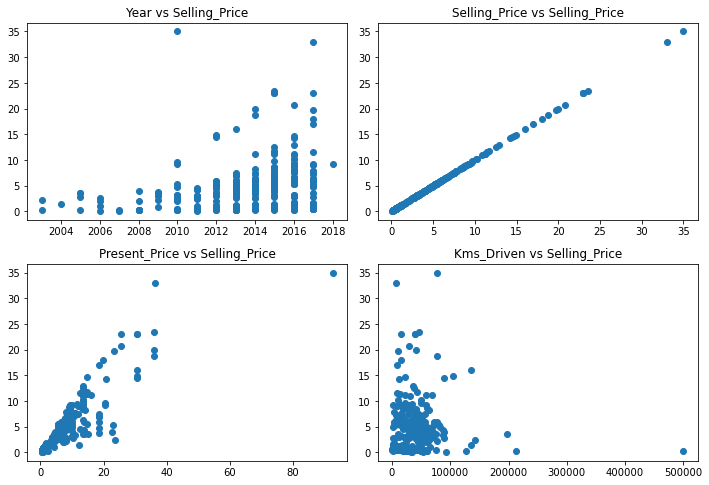

In [9]:
def plot_price_vs_feature(feature, num): #plot the numerical features with target
    plt.subplot(6, 2, num)
    plt.scatter(x=df2[feature], y=df2['Selling_Price'])
    plt.title(feature + ' vs Selling_Price')
    
plt.figure(figsize=(10, 20))

for i, feature in enumerate(numerical_features):
    plot_price_vs_feature(feature, i+1)

plt.tight_layout()

In [10]:
def clean(df, data): #clean the data from outliers
    for x in [data]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan
for i in numerical_features:
    clean(df2, i)
df2.isna().sum() #check for missing values
df2 = df2.dropna() #drop missing values
df2.head(10)
df2.shape
df2.isna().sum()

Year              7
Selling_Price    17
Present_Price    14
Kms_Driven        8
Fuel_Type         0
Seller_Type       0
Transmission      0
Owner             0
dtype: int64

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014.0,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,2013.0,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,2017.0,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,2011.0,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,2014.0,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
5,2018.0,9.25,9.83,2071.0,Diesel,Dealer,Manual,0
6,2015.0,6.75,8.12,18796.0,Petrol,Dealer,Manual,0
7,2015.0,6.50,8.61,33429.0,Diesel,Dealer,Manual,0
8,2016.0,8.75,8.89,20273.0,Diesel,Dealer,Manual,0
9,2015.0,7.45,8.92,42367.0,Diesel,Dealer,Manual,0


(274, 8)

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Figure size 720x1440 with 0 Axes>

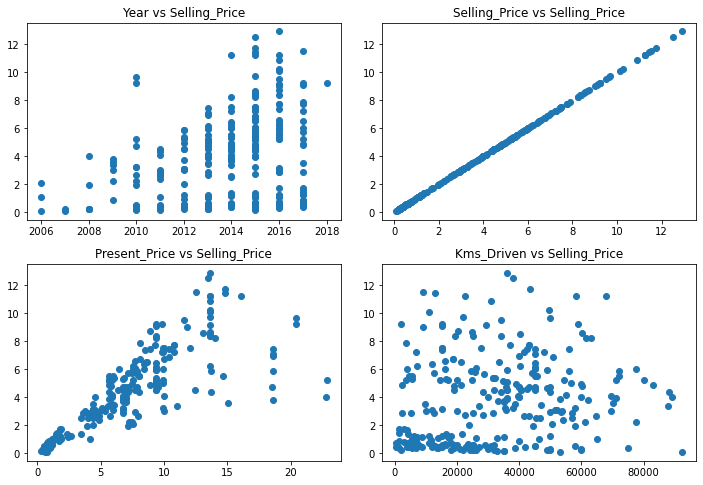

In [11]:
plt.figure(figsize=(10, 20)) #plot the numerical features with target without outliers

for i, feature in enumerate(numerical_features):
    plot_price_vs_feature(feature, i+1)

plt.tight_layout()

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Seller_Type'>

<AxesSubplot:>

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

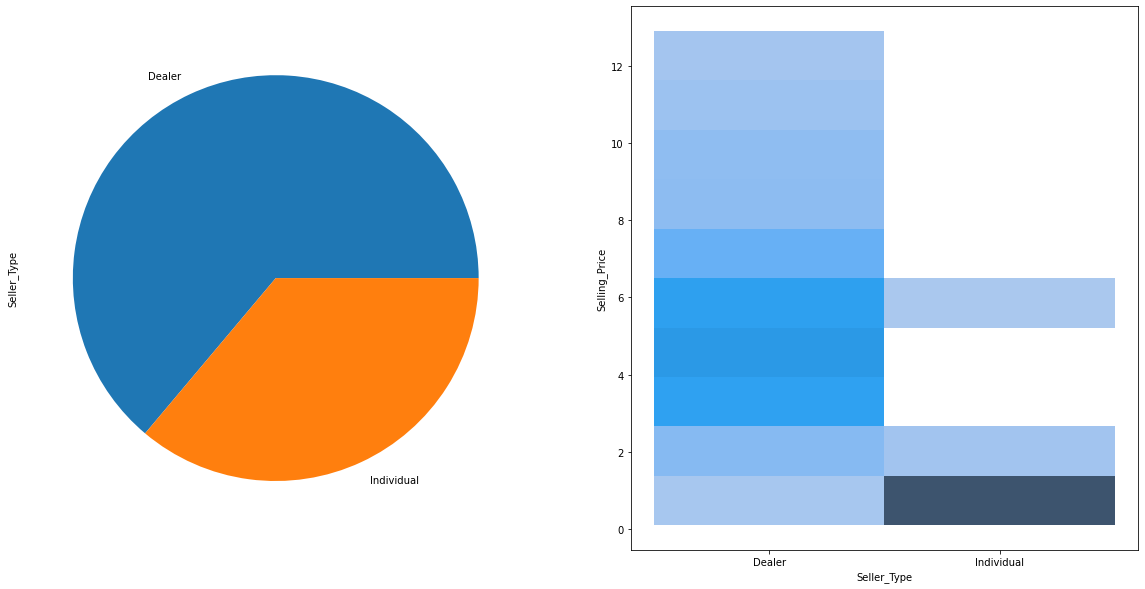

In [12]:
#Four visualisations of different categorical features 
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
df2['Seller_Type'].value_counts().plot(kind='pie')

plt.subplot(1, 2, 2)
sns.histplot(x=df2["Seller_Type"], y=df2['Selling_Price'])

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Transmission'>

<AxesSubplot:>

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

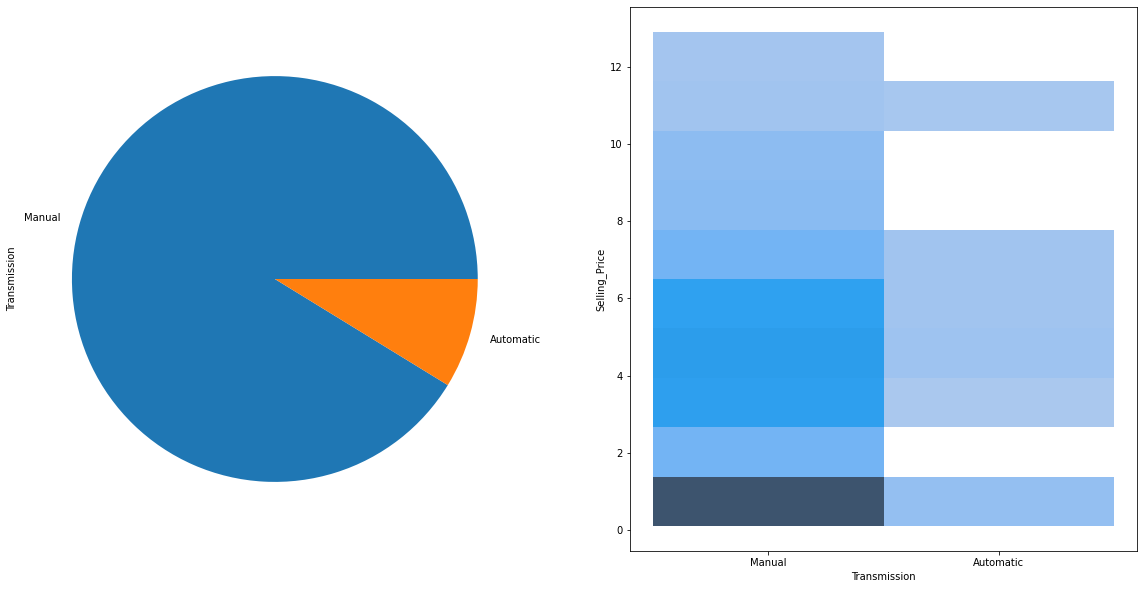

In [13]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
df2['Transmission'].value_counts().plot(kind='pie')

plt.subplot(1, 2, 2)
sns.histplot(x=df2["Transmission"], y=df2['Selling_Price'])

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Owner'>

<AxesSubplot:>

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

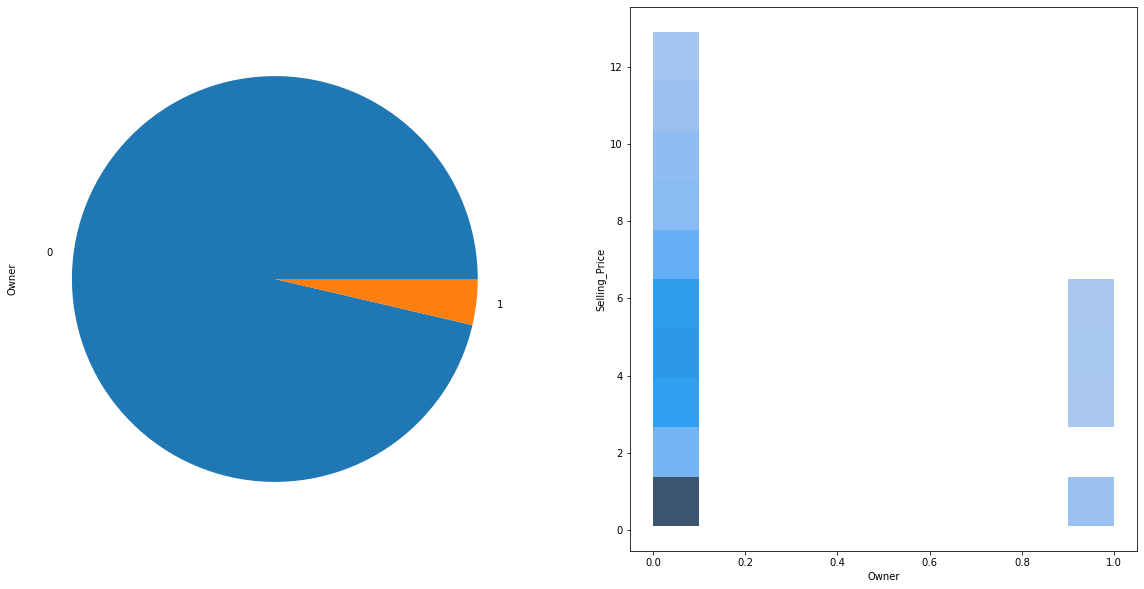

In [14]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
df2['Owner'].value_counts().plot(kind='pie')

plt.subplot(1, 2, 2)
sns.histplot(x=df2["Owner"], y=df2['Selling_Price'])

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:ylabel='Fuel_Type'>

<AxesSubplot:>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

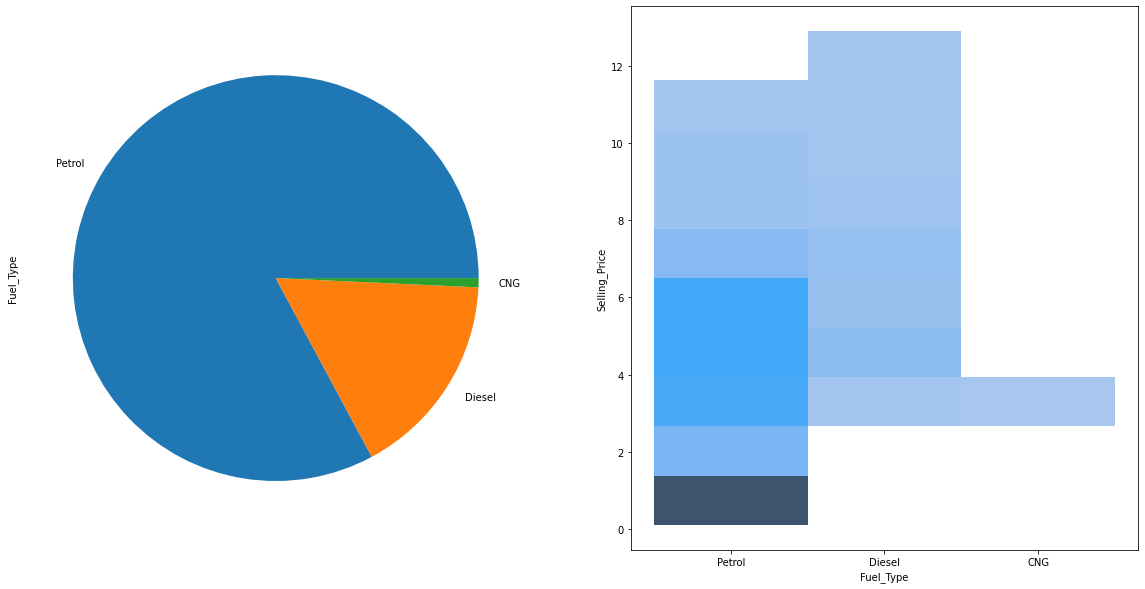

In [15]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
df2['Fuel_Type'].value_counts().plot(kind='pie')

plt.subplot(1, 2, 2)
sns.histplot(x=df2["Fuel_Type"], y=df2['Selling_Price'])

In [16]:
for i in categorical_features: #make dummy variables for categorical features
    df2 = df2.join(pd.get_dummies(df2[i]))
    df2 = df2.drop(i, axis=1)
df2.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,CNG,Diesel,Petrol,Dealer,Individual,Automatic,Manual,0,1
0,2014.0,3.35,5.59,27000.0,0,0,1,1,0,0,1,1,0
1,2013.0,4.75,9.54,43000.0,0,1,0,1,0,0,1,1,0
2,2017.0,7.25,9.85,6900.0,0,0,1,1,0,0,1,1,0
3,2011.0,2.85,4.15,5200.0,0,0,1,1,0,0,1,1,0
4,2014.0,4.60,6.87,42450.0,0,1,0,1,0,0,1,1,0
5,2018.0,9.25,9.83,2071.0,0,1,0,1,0,0,1,1,0
6,2015.0,6.75,8.12,18796.0,0,0,1,1,0,0,1,1,0
7,2015.0,6.50,8.61,33429.0,0,1,0,1,0,0,1,1,0
8,2016.0,8.75,8.89,20273.0,0,1,0,1,0,0,1,1,0
9,2015.0,7.45,8.92,42367.0,0,1,0,1,0,0,1,1,0


In [17]:
df2 = df2.rename(columns = {0 : "Owner_Zero", 1 : "Owner_One", 3 : "Owner_Three"}) #rename string to int

In [57]:
x_train, x_test, y_train, y_test = tts(df2.drop("Selling_Price", axis=1), df2["Selling_Price"], test_size=0.115, random_state=1)

In [58]:
print("Linear Regression")
lireg=LinearRegression().fit(x_train,y_train) #Linear Regression
pred1 = lireg.predict(x_test)
print('Mean Absolute Error:', mae(y_test, pred1))
print('R squared score:', r2_score(y_test, pred1))

Linear Regression
Mean Absolute Error: 0.8972959480266525
R squared score: 0.7816832291514251


In [59]:
print("Ridge")
ridgereg = Ridge(alpha=5).fit(x_train,y_train)  #Ridge Regression
pred2 = ridgereg.predict(x_test)
print('Mean Absolute Error:', mae(y_test, pred2))
print('R squared score:', r2_score(y_test, pred2))

Ridge
Mean Absolute Error: 0.9127035502388168
R squared score: 0.7823865068150931


In [60]:
print("Lasso")
lassoreg = Lasso(alpha = 0.01).fit(x_train,y_train) #Lasso Regression
pred3 = lassoreg.predict(x_test)
print('Mean Absolute Error:', mae(y_test, pred3))
print('R squared score:', r2_score(y_test, pred3))

Lasso
Mean Absolute Error: 0.8934997028785006
R squared score: 0.7882598245502817



R^2: 0.88 on train, 0.78 on test


,Pred Price (train),Actual Price (train),Pred Price (test),Actual Price (test)
0,4.448246,4.10,6.141667,4.50
1,9.534783,11.50,1.206154,0.90
2,0.445224,0.30,4.448246,2.90
3,0.445224,0.55,1.206154,0.60
4,0.445224,0.45,9.534783,6.85


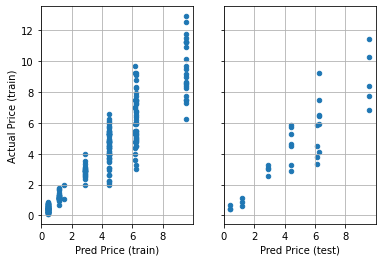

In [67]:
m = DecisionTreeRegressor(random_state=1, max_depth=3).fit(x_train, y_train) #Decision Tree
print(f'\nR^2: {m.score(x_train, y_train):.2f} on train, {m.score(x_test, y_test):.2f} on test')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
dfT = pd.DataFrame([m.predict(x_train), y_train], index=['Pred Price (train)','Actual Price (train)']).T
dfV = pd.DataFrame([m.predict(x_test), y_test], index=['Pred Price (test)','Actual Price (test)']).T
pd.concat([dfT.head(),dfV.head()], axis=1)
a = dfT.plot.scatter(0,1, grid=True, ax=ax1)
a = dfV.plot.scatter(0,1, grid=True, ax=ax2)

In [69]:
print("Decision Tree")
print('Mean Absolute Error:', mae(y_test,m.predict(x_test)))
print('R squared score:', r2_score(y_test, m.predict(x_test)))

Decision Tree
Mean Absolute Error: 0.9770035043134342
R squared score: 0.7849067847115996


<Figure size 3600x1800 with 0 Axes>

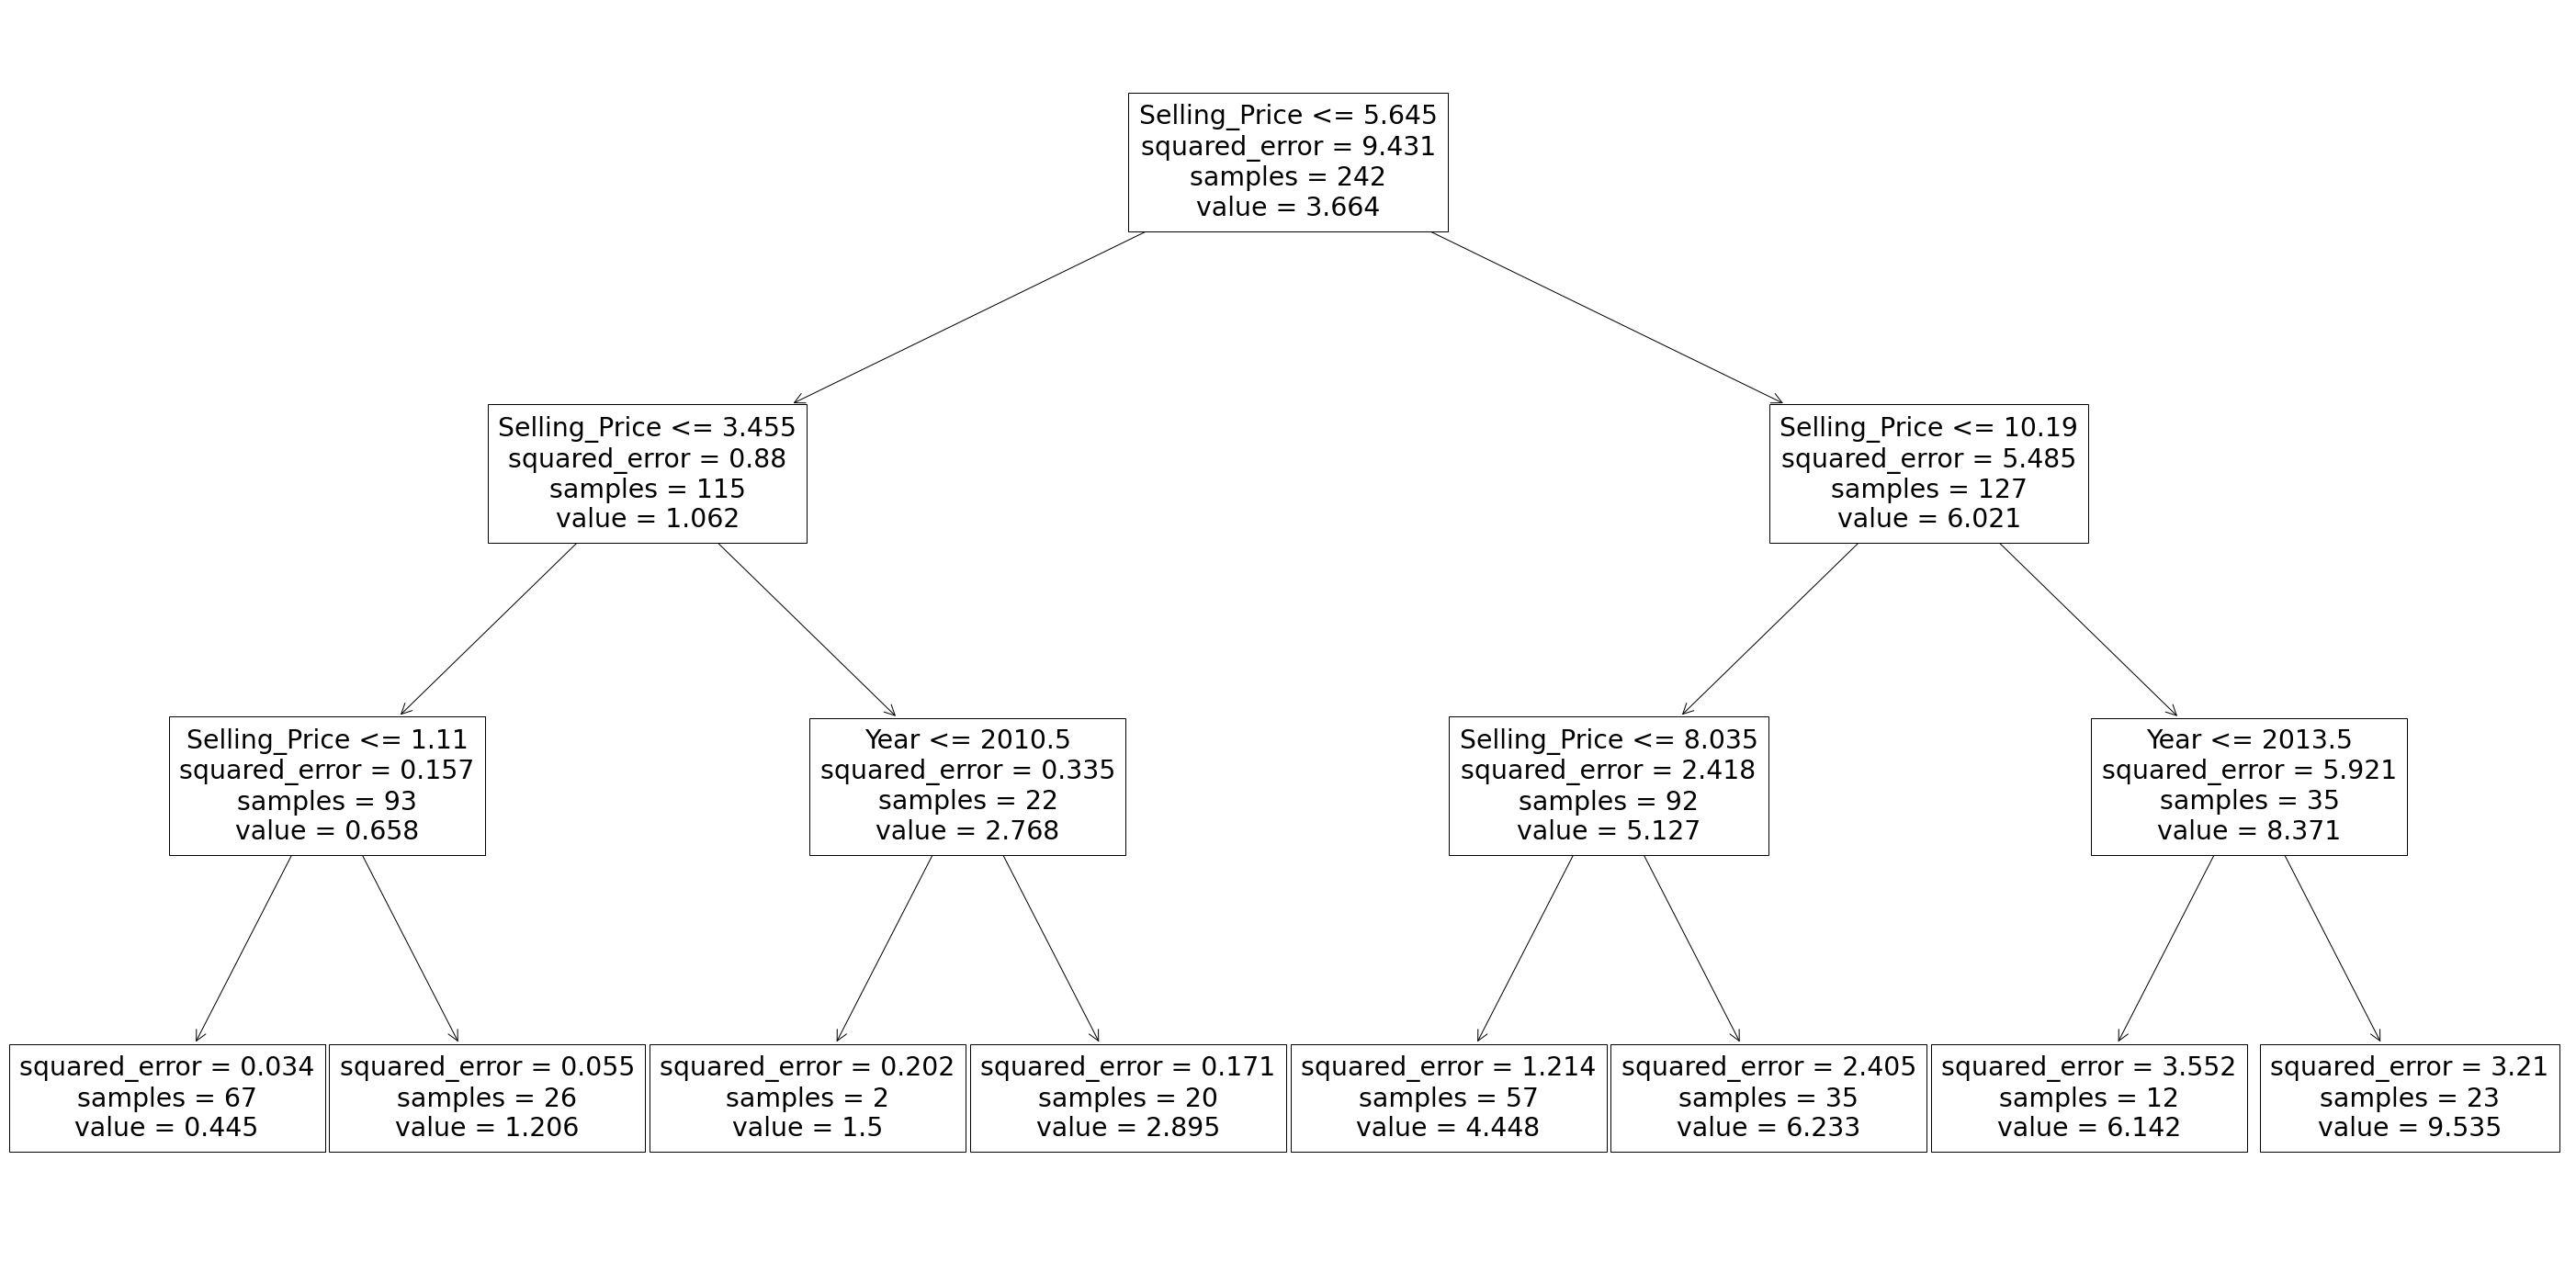

In [56]:
plt.figure(figsize=(50,25))
tmp = sklearn.tree.plot_tree(m, feature_names=df2.columns)

# DATASET 3. Classification: Smoker Classification

In [70]:
df3 = pd.read_csv("smoking.csv") #Open dataset
df3

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [71]:
df3 = df3.drop(['ID', 'oral'], axis=1) #Drop ID and oral, which is always the same
df3

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,N,0


In [72]:
pd.set_option('display.max_rows', 30) #check missing values
pd.set_option('display.max_colwidth', 20)
df3.isnull().sum()
df3.info()
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', 20)

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [73]:
for i in range(len(df3['tartar'])): #making tartar into int variable
    if df3.at[i, 'tartar'] == 'Y':
        df3.at[i, 'tartar'] = 1
    else:
        df3.at[i, 'tartar'] = 0
df3['tartar'] = pd.to_numeric(df3['tartar'])

In [74]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [75]:
df3 = df3.join(pd.get_dummies(df3['gender'])) #Make dummy variables of gender
df3 = df3.drop('gender', axis=1)

In [76]:
df3

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking,F,M
0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0,1,0
1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0,1,0
2,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1,0,1
3,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0,0,1
4,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0,1,0
55688,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0,1,0
55689,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,1,0
55690,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0,1


<Figure size 1800x1800 with 0 Axes>

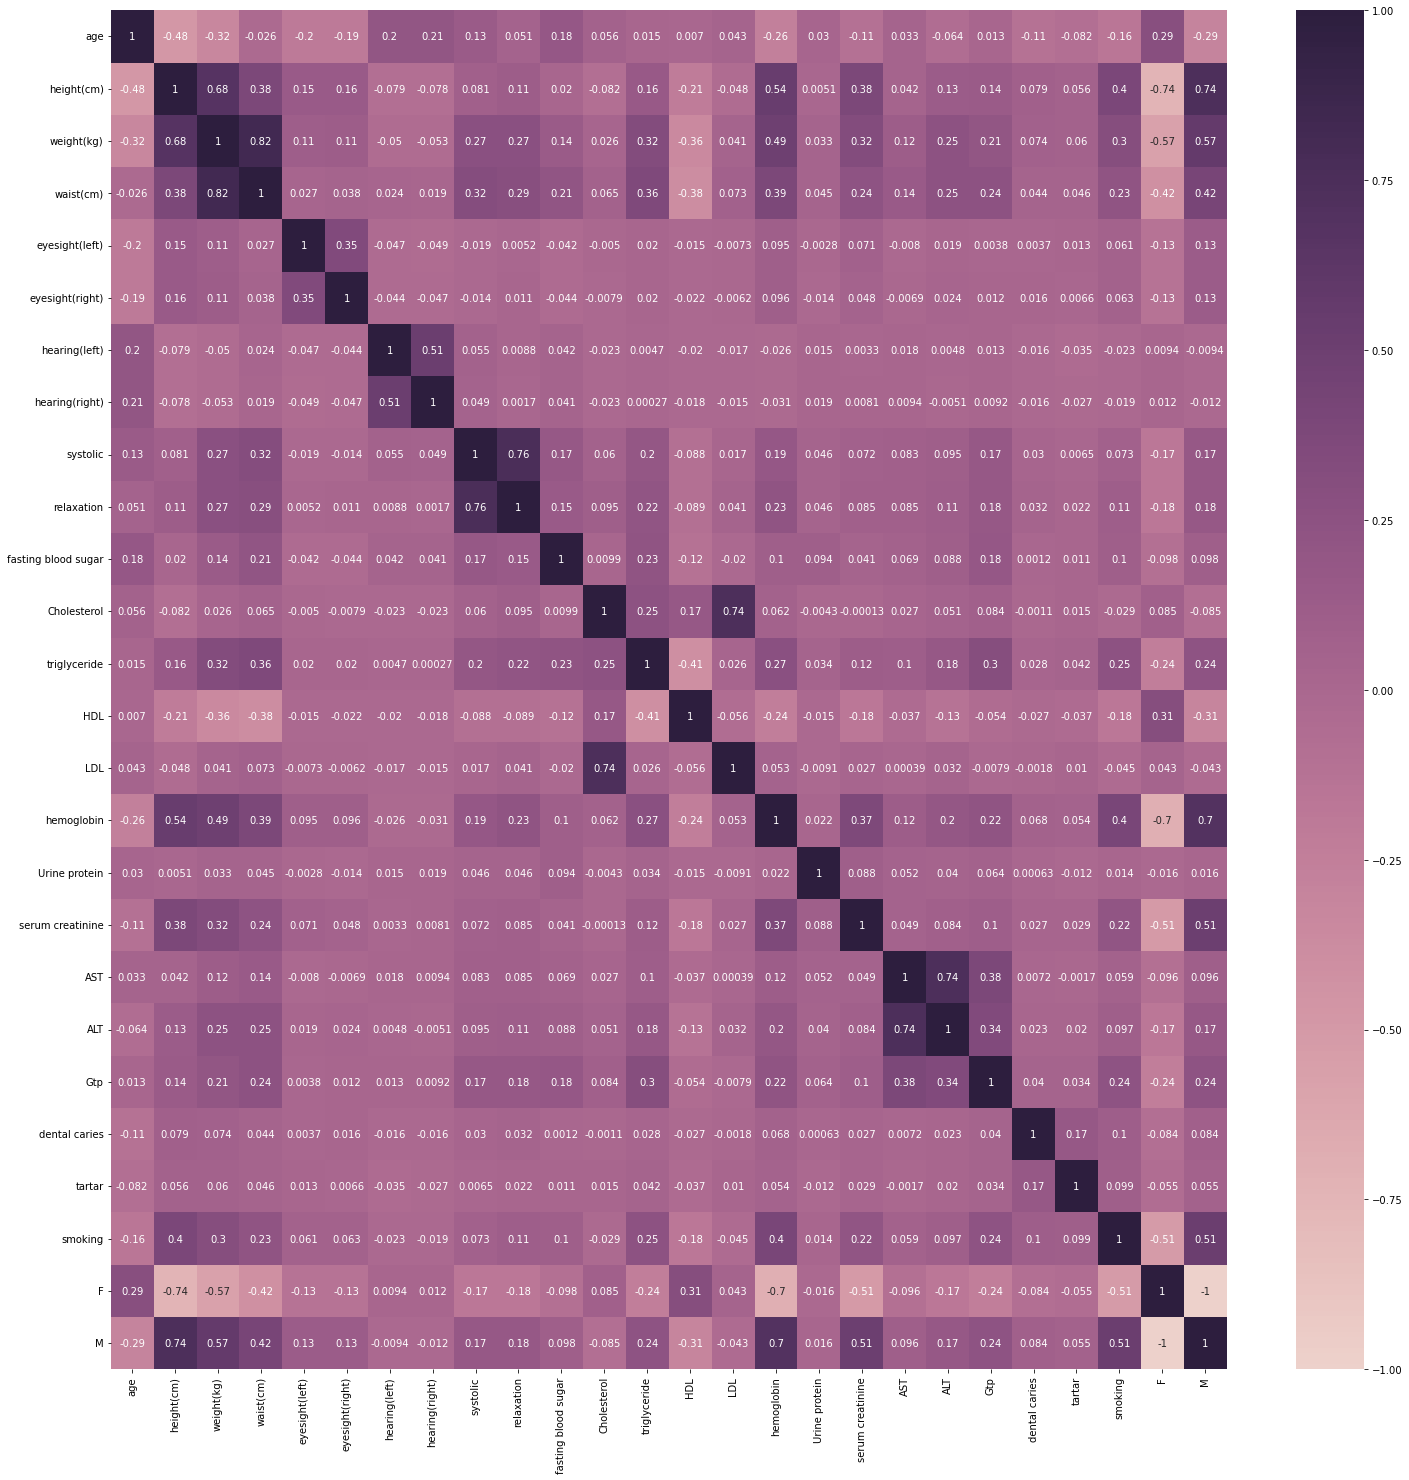

In [77]:
plt.figure(figsize=(25, 25)) #Visualize Correlation plot
ax = sns.heatmap(df3.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

In [78]:
df3.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)', 
        'systolic', 'Cholesterol', 'LDL', 'Urine protein', 'AST'], axis=1, inplace=True) #Drop non-correlated to smoking
df3

,age,height(cm),weight(kg),waist(cm),relaxation,fasting blood sugar,triglyceride,HDL,hemoglobin,serum creatinine,ALT,Gtp,dental caries,tartar,smoking,F,M
0,40,155,60,81.3,73.0,94.0,82.0,73.0,12.9,0.7,19.0,27.0,0,1,0,1,0
1,40,160,60,81.0,70.0,130.0,115.0,42.0,12.7,0.6,19.0,18.0,0,1,0,1,0
2,55,170,60,80.0,86.0,89.0,182.0,55.0,15.8,1.0,16.0,22.0,0,0,1,0,1
3,40,165,70,88.0,60.0,96.0,254.0,45.0,14.7,1.0,26.0,18.0,0,1,0,0,1
4,40,155,60,86.0,74.0,80.0,74.0,62.0,12.5,0.6,14.0,22.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,40,170,65,75.0,68.0,89.0,99.0,75.0,12.3,0.6,7.0,10.0,1,1,0,1,0
55688,45,160,50,70.0,62.0,89.0,69.0,73.0,14.0,0.9,12.0,14.0,0,1,0,1,0
55689,55,160,50,68.5,72.0,88.0,77.0,79.0,12.4,0.5,11.0,12.0,0,0,0,1,0
55690,60,165,60,78.0,76.0,107.0,79.0,48.0,14.4,0.7,19.0,18.0,0,0,0,0,1


In [79]:
#Visualisation of smoking percentage 
df3['smoking'].value_counts().plot(kind='pie', autopct=make_autopct(df3['smoking'].value_counts()))

NameError: name 'make_autopct' is not defined

In [80]:
y = df3['smoking'] #target
x = df3.drop(['smoking'], axis = 1) #features

In [81]:
#Preprocessing (add non-linear features (powers and interactions))
poly = PolynomialFeatures(degree=4, include_bias=False, order='F') 
x=poly.fit_transform(x)

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [82]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=1) #Train-test split of dataframe

In [117]:
qda = QDA(tol = 0, reg_param=1e-12).fit(x_train, y_train) #Quadratic Discriminant Analysis

<AxesSubplot:ylabel='None'>

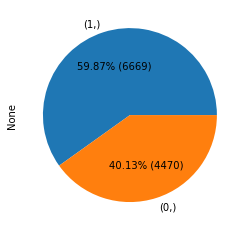

In [118]:
pred = pd.DataFrame(qda.predict(x_test), index=range(1,len(x_test)+1), columns=['smoking']) #Distribution of smokers in test
pred.value_counts(normalize=True).plot(kind='pie', autopct=make_autopct(pred.value_counts()))

In [120]:
print("Train Score ", qda.score(x_train,y_train))
print("Test Score ", qda.score(x_test,y_test))
print("Accuracy Score ",accuracy_score(y_test,pred)*100)
print("Confusion_matrix \n",confusion_matrix(y_test,pred))
print("Classification_report \n",classification_report(y_test,pred))

Train Score  0.7535295041860256
Test Score  0.7300475805727623
Accuracy Score  73.00475805727623
Confusion_matrix 
 [[4247 2784]
 [ 223 3885]]
Classification_report 
               precision    recall  f1-score   support

           0       0.95      0.60      0.74      7031
           1       0.58      0.95      0.72      4108

    accuracy                           0.73     11139
   macro avg       0.77      0.77      0.73     11139
weighted avg       0.81      0.73      0.73     11139



In [83]:
dt = DecisionTreeClassifier().fit(x_train, y_train) #Desision Tree

In [84]:
pred = dt.predict(x_test)

In [85]:
print("Train Score ", dt.score(x_train,y_train))
print("Test Score ", dt.score(x_test,y_test))
print("Accuracy Score ",accuracy_score(y_test,pred)*100)
print("Confusion_matrix \n",confusion_matrix(y_test,pred))
print("Classification_report \n",classification_report(y_test,pred))

Train Score  1.0
Test Score  0.7876829158811384
Accuracy Score  78.76829158811384
Confusion_matrix 
 [[5883 1148]
 [1217 2891]]
Classification_report 
               precision    recall  f1-score   support

           0       0.83      0.84      0.83      7031
           1       0.72      0.70      0.71      4108

    accuracy                           0.79     11139
   macro avg       0.77      0.77      0.77     11139
weighted avg       0.79      0.79      0.79     11139



[Text(0.36212434187304676, 0.9910714285714286, 'x[2288] <= -0.399\ngini = 0.465\nsamples = 44553\nvalue = [28206, 16347]'),
 Text(0.03701138903769886, 0.9732142857142857, 'x[3321] <= -0.27\ngini = 0.09\nsamples = 16476\nvalue = [15699, 777]'),
 Text(0.005691410965120491, 0.9553571428571429, 'x[424] <= -1.033\ngini = 0.383\nsamples = 283\nvalue = [210, 73]'),
 Text(0.004734871307117048, 0.9375, 'x[1077] <= -0.224\ngini = 0.431\nsamples = 35\nvalue = [11, 24]'),
 Text(0.00435225544391567, 0.9196428571428571, 'x[4143] <= -0.327\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.003969639580714292, 0.9017857142857143, 'x[1435] <= -1.557\ngini = 0.077\nsamples = 25\nvalue = [1, 24]'),
 Text(0.0035870237175129145, 0.8839285714285714, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.00435225544391567, 0.8839285714285714, 'gini = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.004734871307117048, 0.9017857142857143, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.005117487170318425, 

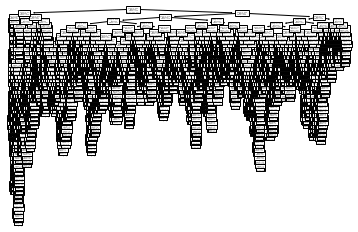

In [87]:
tree.plot_tree(dt)